In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import numpy as np

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Print dataset shape
print("Training set shape:", x_train.shape)
print("Testing set shape:", x_test.shape)

# Convert labels to 1D array
y_train = y_train.flatten()
y_test = y_test.flatten()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Training set shape: (50000, 32, 32, 3)
Testing set shape: (10000, 32, 32, 3)


In [ ]:
from tensorflow.keras.utils import to_categorical

# Normalize pixel values to range [0,1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# One-hot encode the labels (since we have 10 classes)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Print shape after preprocessing
print("Training set shape:", x_train.shape)
print("Testing set shape:", x_test.shape)
print("Example label:", y_train[0])  # Example one-hot encoded label


Training set shape: (50000, 32, 32, 3)
Testing set shape: (10000, 32, 32, 3)
Example label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
from sklearn.model_selection import train_test_split

# Split training data into new training (80%) and validation (20%) sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Print new dataset shapes
print("New Training set shape:", x_train.shape)
print("Validation set shape:", x_val.shape)
print("Test set shape:", x_test.shape)


New Training set shape: (40000, 32, 32, 3)
Validation set shape: (10000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, LSTM, Dense, TimeDistributed, Reshape

# Define the model
model = Sequential()

# CNN part
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

# Reshape to (timesteps, features) for LSTM
model.add(Reshape((1, -1)))  # (batch_size, 1 timestep, features)

# LSTM part
model.add(LSTM(64, return_sequences=False))  # LSTM takes sequence input
model.add(Dense(10, activation='softmax'))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 1, 2304)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │         606,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 626,506 (2.39 MB)

 Trainable params: 626,506 (2.39 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.3760 - loss: 1.7030 - val_accuracy: 0.5630 - val_loss: 1.2374
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.5874 - loss: 1.1571 - val_accuracy: 0.6385 - val_loss: 1.0428
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6615 - loss: 0.9610 - val_accuracy: 0.6644 - val_loss: 0.9693
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7065 - loss: 0.8338 - val_accuracy: 0.6612 - val_loss: 0.9811
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7429 - loss: 0.7368 - val_accuracy: 0.6767 - val_loss: 0.9483
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7926 - loss: 0.6228 - val_accuracy: 0.6805 - val_loss: 0.9578
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8190 - loss: 0.5273 - val_accuracy: 0.6777 - val_loss: 0.9842
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8569 - loss: 0.429

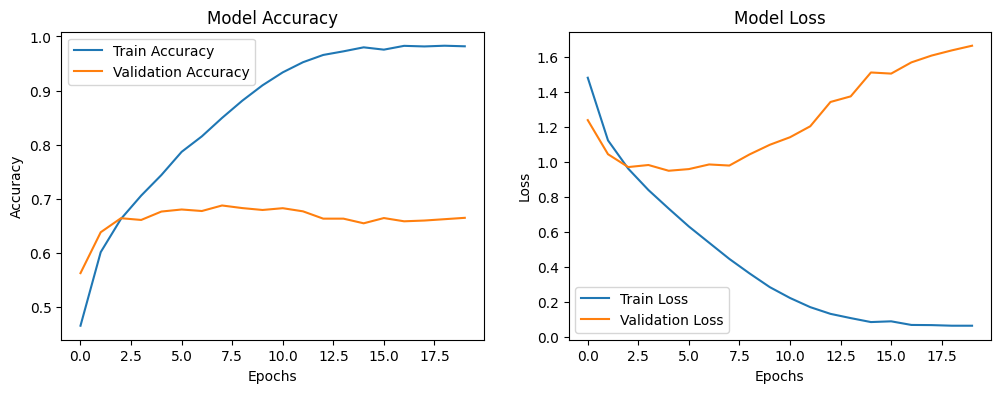

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6715 - loss: 1.6529
Test Accuracy: 0.6651
Test Loss: 1.6622


In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class labels
y_true_classes = y_test.argmax(axis=1)  # Convert one-hot encoded labels back to class labels


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


              precision    recall  f1-score   support

           0       0.72      0.71      0.72      1000
           1       0.78      0.78      0.78      1000
           2       0.57      0.52      0.54      1000
           3       0.48      0.48      0.48      1000
           4       0.62      0.54      0.58      1000
           5       0.54      0.61      0.57      1000
           6       0.70      0.77      0.73      1000
           7       0.70      0.72      0.71      1000
           8       0.78      0.79      0.79      1000
           9       0.76      0.73      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.66     10000
weighted avg       0.67      0.67      0.66     10000



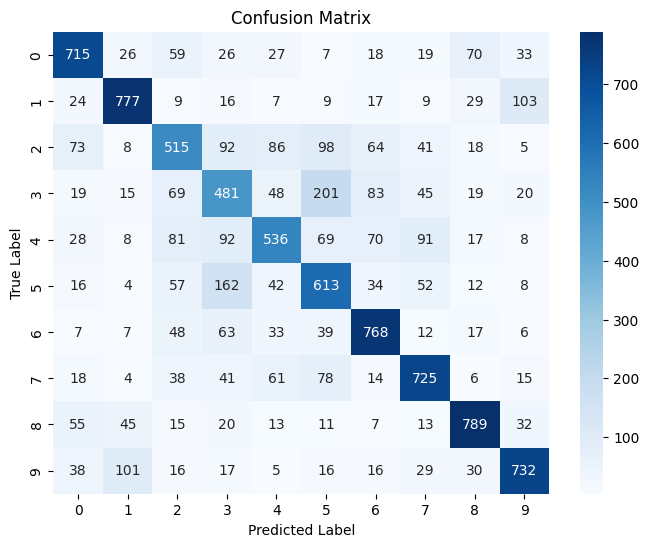

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Print classification report
print(classification_report(y_true_classes, y_pred_classes))

# Plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
